In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/yohaneskh/Car_Price_Prediction/refs/heads/main/Car%20Price%20Prediction.csv")

In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df.isna().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [ ]:
# How to check and show empty strings if there's any in each column
for col in df.select_dtypes(include=["object"]):
  empty_string_count = df[df[col] == ''].shape[0]
  print(f"Column '{col}' has {empty_string_count} empty strings.")

Column 'Levy' has 0 empty strings.
Column 'Manufacturer' has 0 empty strings.
Column 'Model' has 0 empty strings.
Column 'Category' has 0 empty strings.
Column 'Leather interior' has 0 empty strings.
Column 'Fuel type' has 0 empty strings.
Column 'Engine volume' has 0 empty strings.
Column 'Mileage' has 0 empty strings.
Column 'Gear box type' has 0 empty strings.
Column 'Drive wheels' has 0 empty strings.
Column 'Doors' has 0 empty strings.
Column 'Wheel' has 0 empty strings.
Column 'Color' has 0 empty strings.


In [ ]:
# For Levy, first we need to replace all commas with dots and non numeric values into NaN (if any)
df["Levy"] = pd.to_numeric(df["Levy"].astype(str).str.replace(',', ''), errors="coerce")

# Then we replace all NaN values with 0 (if any)
df["Levy"].fillna(0, inplace=True)

# Then we change data type of Levy from object to integer
df["Levy"] = df["Levy"].astype(int)

In [ ]:
# For Engine volume, we need only 'numbers/numerical values with dots' as values and change the data type into float
df["Engine volume"] = df["Engine volume"].apply(lambda x: re.findall(r"\d+\.\d+|\d+", x)[0]).astype(float)
df["Engine volume"].head()

,Engine volume
0,3.5
1,3.0
2,1.3
3,2.5
4,1.3


In [ ]:
# For Mileage, we need to delete all "km" remarks and transform the value into integer
df["Mileage"] = df["Mileage"].str.replace(" km", "", regex=True).astype(int)
df["Mileage"].head()

,Mileage
0,186005
1,192000
2,200000
3,168966
4,91901


In [ ]:
# For Leather interior, we transform the Yes and No into 1 for Yes and 0 for No
df["Leather interior"] = df["Leather interior"].map({"Yes": 1, "No": 0})
df["Leather interior"].head()

,Leather interior
0,1
1,0
2,0
3,1
4,1


In [ ]:
# For Doors variable/column, we should check whether it contains wrong types of data, missing and unique values or not.

# Check any relevant information regarding Doors variable/column
print(df["Doors"].unique()) # to check any unique values
print(df["Doors"].dtype) # to check the data type

# Clean Doors variable/column
df["Doors"] = df["Doors"].astype(str).str.extract("(\d+)") # Only take the numbers, no strings
df["Doors"] = pd.to_numeric(df["Doors"], errors="coerce") # Convert to numeric

# Show the results
print(df["Doors"].unique())
print(df["Doors"].dtype)

['04-May' '02-Mar' '>5']
object
[4 2 5]
int64


Let's check the value distribution for variables: Levy, Engine volume, Mileage, Leather interior and Doors

In [ ]:
df["Levy"].value_counts()

,count
Levy,
0,5819
765,486
891,461
639,410
640,405
...,...
3156,1
2908,1
1279,1


In [ ]:
df["Levy"].unique()

array([ 1399,  1018,     0,   862,   446,   891,   761,   751,   394,
        1053,  1055,  1079,   810,  2386,  1850,   531,   586,  1249,
        2455,   583,  1537,  1288,   915,  1750,   707,  1077,  1486,
        1091,   650,   382,  1436,  1194,   503,  1017,  1104,   639,
         629,   919,   781,   530,   640,   765,   777,   779,   934,
         769,   645,  1185,  1324,   830,  1187,  1111,   760,   642,
        1604,  1095,   966,   473,  1138,  1811,   988,   917,  1156,
         687, 11714,   836,  1347,  2866,  1646,   259,   609,   697,
         585,   475,   690,   308,  1823,  1361,  1273,   924,   584,
        2078,   831,  1172,   893,  1872,  1885,  1266,   447,  2148,
        1730,   730,   289,   502,   333,  1325,   247,   879,  1342,
        1327,  1598,  1514,  1058,   738,  1935,   481,  1522,  1282,
         456,   880,   900,   798,  1277,   442,  1051,   790,  1292,
        1047,   528,  1211,  1493,  1793,   574,   930,  1998,   271,
         706,  1481,

In [ ]:
df["Engine volume"].value_counts()

,count
Engine volume,
2.0,4324
2.5,2370
1.8,1937
1.6,1578
1.5,1393
...,...
3.1,1
7.3,1
0.5,1


In [ ]:
df["Engine volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [ ]:
df["Mileage"].value_counts()

,count
Mileage,
0,721
200000,183
150000,161
160000,120
100000,119
...,...
63083,1
28750,1
25077,1


In [ ]:
df["Mileage"].unique()

array([186005, 192000, 200000, ..., 140607, 307325, 186923])

In [ ]:
df["Leather interior"].value_counts()

,count
Leather interior,
1,13954
0,5283


In [ ]:
df["Leather interior"].unique()

array([1, 0])

In [ ]:
df["Doors"].value_counts()

,count
Doors,
4,18332
2,777
5,128


In [ ]:
df["Doors"].unique()

array([4, 2, 5])

For columns (variables) above such as Levy, Engine volume, Mileage, Leather interior and Doors, they are not 'categorical' variables but 'numerical' variables.

Therefore, we don't have to use use Label Encoding or One-hot Encoding for cleaning and transforming values inside each variables.

As a brief summary of what we did previously,
1. Levy: changed the data type from obj to int while replacing commas into dots and non numeric values into zeroes.
2. Engine volume: delete any texts (e.g. turbo) from each value and change the data type from obj into float.
3. Mileage: delete any texts (km) from each value and change the data type from obj into int.
4. Leather interior: transform 'Yes' as 1 and 'No' as 0
5. Doors:  take only the numbers, change the values into numerics and transform the data type into int.

In [ ]:
# Let's check other columns as well, do they have incorrect data types (object)?
df.select_dtypes(include=["object"]).columns

Index(['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

There are variables with few value variations and some have lots of value variations.

For variables with lots of value variations, we will use Label Encoding (e.g. Manufacturer, Model and Category).

But for those with fewer value variations, we will use One-hot Encoding (e.g. Fuel type, Gear box type, Drive wheels, Wheel and Color).

Firstly, let's check and use Label Encoding for variables with many value variations.

It is possible to make a dictionary to act as a reminder which number represent which value.

In [ ]:
# Let's make a dictionary to save mapping results of Label Encoding for Manufacturer, Model and Category
df["Manufacturer"] = pd.Categorical(df["Manufacturer"])
df["Model"] = pd.Categorical(df["Model"])
df["Category"] = pd.Categorical(df["Category"])

manufacturer_mapping = dict(enumerate(df["Manufacturer"].cat.categories))
model_mapping = dict(enumerate(df["Model"].cat.categories))
category_mapping = dict(enumerate(df["Category"].cat.categories))

# Show mapping results of Manufacturer
print("Mapping for Manufacturer:")
print(manufacturer_mapping)

# Show mapping results of Model
print("\nMapping for Model:")
print(model_mapping)

# Show mapping results of Category
print("\nMapping for Category:")
print(category_mapping)

Mapping for Manufacturer:
{0: 'ACURA', 1: 'ALFA ROMEO', 2: 'ASTON MARTIN', 3: 'AUDI', 4: 'BENTLEY', 5: 'BMW', 6: 'BUICK', 7: 'CADILLAC', 8: 'CHEVROLET', 9: 'CHRYSLER', 10: 'CITROEN', 11: 'DAEWOO', 12: 'DAIHATSU', 13: 'DODGE', 14: 'FERRARI', 15: 'FIAT', 16: 'FORD', 17: 'GAZ', 18: 'GMC', 19: 'GREATWALL', 20: 'HAVAL', 21: 'HONDA', 22: 'HUMMER', 23: 'HYUNDAI', 24: 'INFINITI', 25: 'ISUZU', 26: 'JAGUAR', 27: 'JEEP', 28: 'KIA', 29: 'LAMBORGHINI', 30: 'LANCIA', 31: 'LAND ROVER', 32: 'LEXUS', 33: 'LINCOLN', 34: 'MASERATI', 35: 'MAZDA', 36: 'MERCEDES-BENZ', 37: 'MERCURY', 38: 'MINI', 39: 'MITSUBISHI', 40: 'MOSKVICH', 41: 'NISSAN', 42: 'OPEL', 43: 'PEUGEOT', 44: 'PONTIAC', 45: 'PORSCHE', 46: 'RENAULT', 47: 'ROLLS-ROYCE', 48: 'ROVER', 49: 'SAAB', 50: 'SATURN', 51: 'SCION', 52: 'SEAT', 53: 'SKODA', 54: 'SSANGYONG', 55: 'SUBARU', 56: 'SUZUKI', 57: 'TESLA', 58: 'TOYOTA', 59: 'UAZ', 60: 'VAZ', 61: 'VOLKSWAGEN', 62: 'VOLVO', 63: 'ZAZ', 64: 'სხვა'}

Mapping for Model:
{0: '09-Mar', 1: '100', 2: '100 NX'

In [ ]:
label_encoder = LabelEncoder()

# Selecting columns (variables) with many unique values
for col in ["Manufacturer", "Model", "Category"]:
    df[col] = label_encoder.fit_transform(df[col])

# Showing brief result of Label Encoding for selected variables above,
df[["Manufacturer", "Model", "Category"]].head()

,Manufacturer,Model,Category
0,32,1242,4
1,8,658,4
2,21,684,3
3,16,661,4
4,21,684,3


Secondly, let's check and use One-hot econding for variables with fewer value variations.

In [ ]:
# One-Hot Encoding for variables with fewer categories
df = pd.get_dummies(df, columns=["Fuel type", "Gear box type", "Drive wheels", "Wheel", "Color"], drop_first=True)

# Show the results
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,1399,32,1242,2010,4,1,3.5,186005,...,False,False,False,False,False,False,True,False,False,False
1,44731507,16621,1018,8,658,2011,4,0,3.0,192000,...,False,False,False,False,False,False,False,False,False,False
2,45774419,8467,0,21,684,2006,3,0,1.3,200000,...,False,False,False,False,False,False,False,False,False,False
3,45769185,3607,862,16,661,2011,4,1,2.5,168966,...,False,False,False,False,False,False,False,False,True,False
4,45809263,11726,446,21,684,2014,3,1,1.3,91901,...,False,False,False,False,False,False,True,False,False,False


We can also double check whether the results of our cleaning and transformation methods of each variables are already appropriate or not.

In [ ]:
print(df[["Levy", "Engine volume", "Mileage", "Leather interior", "Doors"]].head())

   Levy  Engine volume  Mileage  Leather interior  Doors
0  1399            3.5   186005                 1      4
1  1018            3.0   192000                 0      4
2     0            1.3   200000                 0      4
3   862            2.5   168966                 1      4
4   446            1.3    91901                 1      4


In [ ]:
print(df[["Manufacturer", "Model", "Category"]].head())

   Manufacturer  Model  Category
0            32   1242         4
1             8    658         4
2            21    684         3
3            16    661         4
4            21    684         3


In [ ]:
print(df[['Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Wheel_Right-hand drive',
       'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Carnelian red',
       'Color_Golden', 'Color_Green', 'Color_Grey', 'Color_Orange',
       'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver']].head())

   Fuel type_Diesel  Fuel type_Hybrid  Fuel type_Hydrogen  Fuel type_LPG  \
0             False              True               False          False   
1             False             False               False          False   
2             False             False               False          False   
3             False              True               False          False   
4             False             False               False          False   

   Fuel type_Petrol  Fuel type_Plug-in Hybrid  Gear box type_Manual  \
0             False                     False                 False   
1              True                     False                 False   
2              True                     False                 False   
3             False                     False                 False   
4              True                     False                 False   

   Gear box type_Tiptronic  Gear box type_Variator  Drive wheels_Front  ...  \
0                    False           

In [ ]:
print(df.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Engine volume', 'Mileage', 'Cylinders',
       'Doors', 'Airbags', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Wheel_Right-hand drive',
       'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Carnelian red',
       'Color_Golden', 'Color_Green', 'Color_Grey', 'Color_Orange',
       'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver',
       'Color_Sky blue', 'Color_White', 'Color_Yellow'],
      dtype='object')


These are the current information regarding the variables that will be used for linear regression of machine learning.

That leaves us with three (3) remaining variables that need to be checked, cleaned and transformed if needed.

They are,
1. Cylinders
2. Prod. Year
3. Airbags

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        19237 non-null  int64  
 1   Price                     19237 non-null  int64  
 2   Levy                      19237 non-null  int64  
 3   Manufacturer              19237 non-null  int64  
 4   Model                     19237 non-null  int64  
 5   Prod. year                19237 non-null  int64  
 6   Category                  19237 non-null  int64  
 7   Leather interior          19237 non-null  int64  
 8   Engine volume             19237 non-null  float64
 9   Mileage                   19237 non-null  int64  
 10  Cylinders                 19237 non-null  float64
 11  Doors                     19237 non-null  int64  
 12  Airbags                   19237 non-null  int64  
 13  Fuel type_Diesel          19237 non-null  bool   
 14  Fuel t

Firstly, Cylinders should be in int not float (e.g. 4, 6, 8 etc), let's change its data type into int.

In [ ]:
df["Cylinders"] = df["Cylinders"].astype(int)

Secondly, it is easier to examine the relevance of car's price and its age, therefore we can drop Production Year (Prod. year) column after we create a new column for Car age.

In [ ]:
# Calculate each car's age based on current year (2025)
# and drop the original column of "Prod. year"
df["Car_age"] = 2025 - df["Prod. year"]
df.drop("Prod. year", axis=1, inplace=True)

Thirdly, we can use the current values of Airbags directly. But let's try to do some binning for them. Binning will make it easier for people to understand Airbags' values.

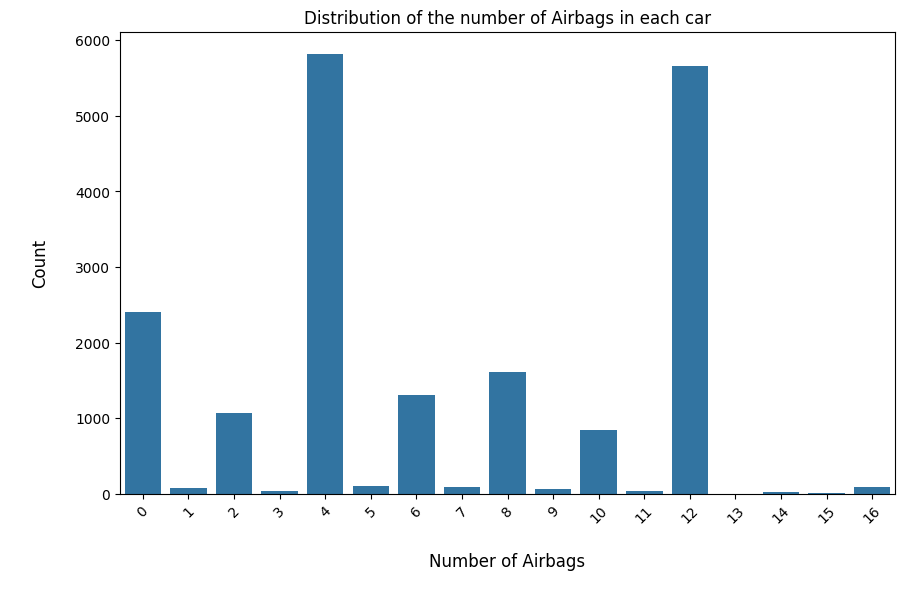

In [ ]:
# No. of airbags distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Airbags", data=df)
plt.title("Distribution of the number of Airbags in each car")
plt.xlabel("\nNumber of Airbags\n", fontsize=12)
plt.ylabel("\nCount\n", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create a new column called 'Airbags_category' and delete the original 'Airbags' column

def bin_airbags(x):
    if x <= 2:
        return "Few"
    elif x <= 6:
        return "Moderate"
    else:
        return "Many"

df["Airbags_category"] = df["Airbags"].apply(bin_airbags)
df.drop("Airbags", axis=1, inplace=True)

To sum up what we've done just now,
1. Cylinder: change data type from float to int.
2. Prod. year: create new variable called Car_age and delete the original Prod.year column.
3. Airbags: the values are  binned, create new variable called Airbags_category and delete the original Airbags column.

Now before we can start create and train linear regression model, we should check the dataset once again to make sure all variables are already in a proper setting, so it would easier for python to read the dataset variables and values.

For example, we can transform the datatype of Airbags_category binning results (Few, Moderate, Many) with one-hot encoding.

We can also drop any unnecessary variable, for example ID and Model (they are too specific).

In [ ]:
df = pd.get_dummies(df, columns=["Airbags_category"])

In [ ]:
df.drop(columns=["ID", "Model"], inplace=True)

In [ ]:
print(df.columns)

Index(['Price', 'Levy', 'Manufacturer', 'Category', 'Leather interior',
       'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Fuel type_Diesel',
       'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG',
       'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Wheel_Right-hand drive',
       'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Carnelian red',
       'Color_Golden', 'Color_Green', 'Color_Grey', 'Color_Orange',
       'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver',
       'Color_Sky blue', 'Color_White', 'Color_Yellow', 'Car_age',
       'Airbags_category_Few', 'Airbags_category_Many',
       'Airbags_category_Moderate'],
      dtype='object')


In [ ]:
# The latest data information of all variables (columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      19237 non-null  int64  
 1   Levy                       19237 non-null  int64  
 2   Manufacturer               19237 non-null  int64  
 3   Category                   19237 non-null  int64  
 4   Leather interior           19237 non-null  int64  
 5   Engine volume              19237 non-null  float64
 6   Mileage                    19237 non-null  int64  
 7   Cylinders                  19237 non-null  int64  
 8   Doors                      19237 non-null  int64  
 9   Fuel type_Diesel           19237 non-null  bool   
 10  Fuel type_Hybrid           19237 non-null  bool   
 11  Fuel type_Hydrogen         19237 non-null  bool   
 12  Fuel type_LPG              19237 non-null  bool   
 13  Fuel type_Petrol           19237 non-null  boo

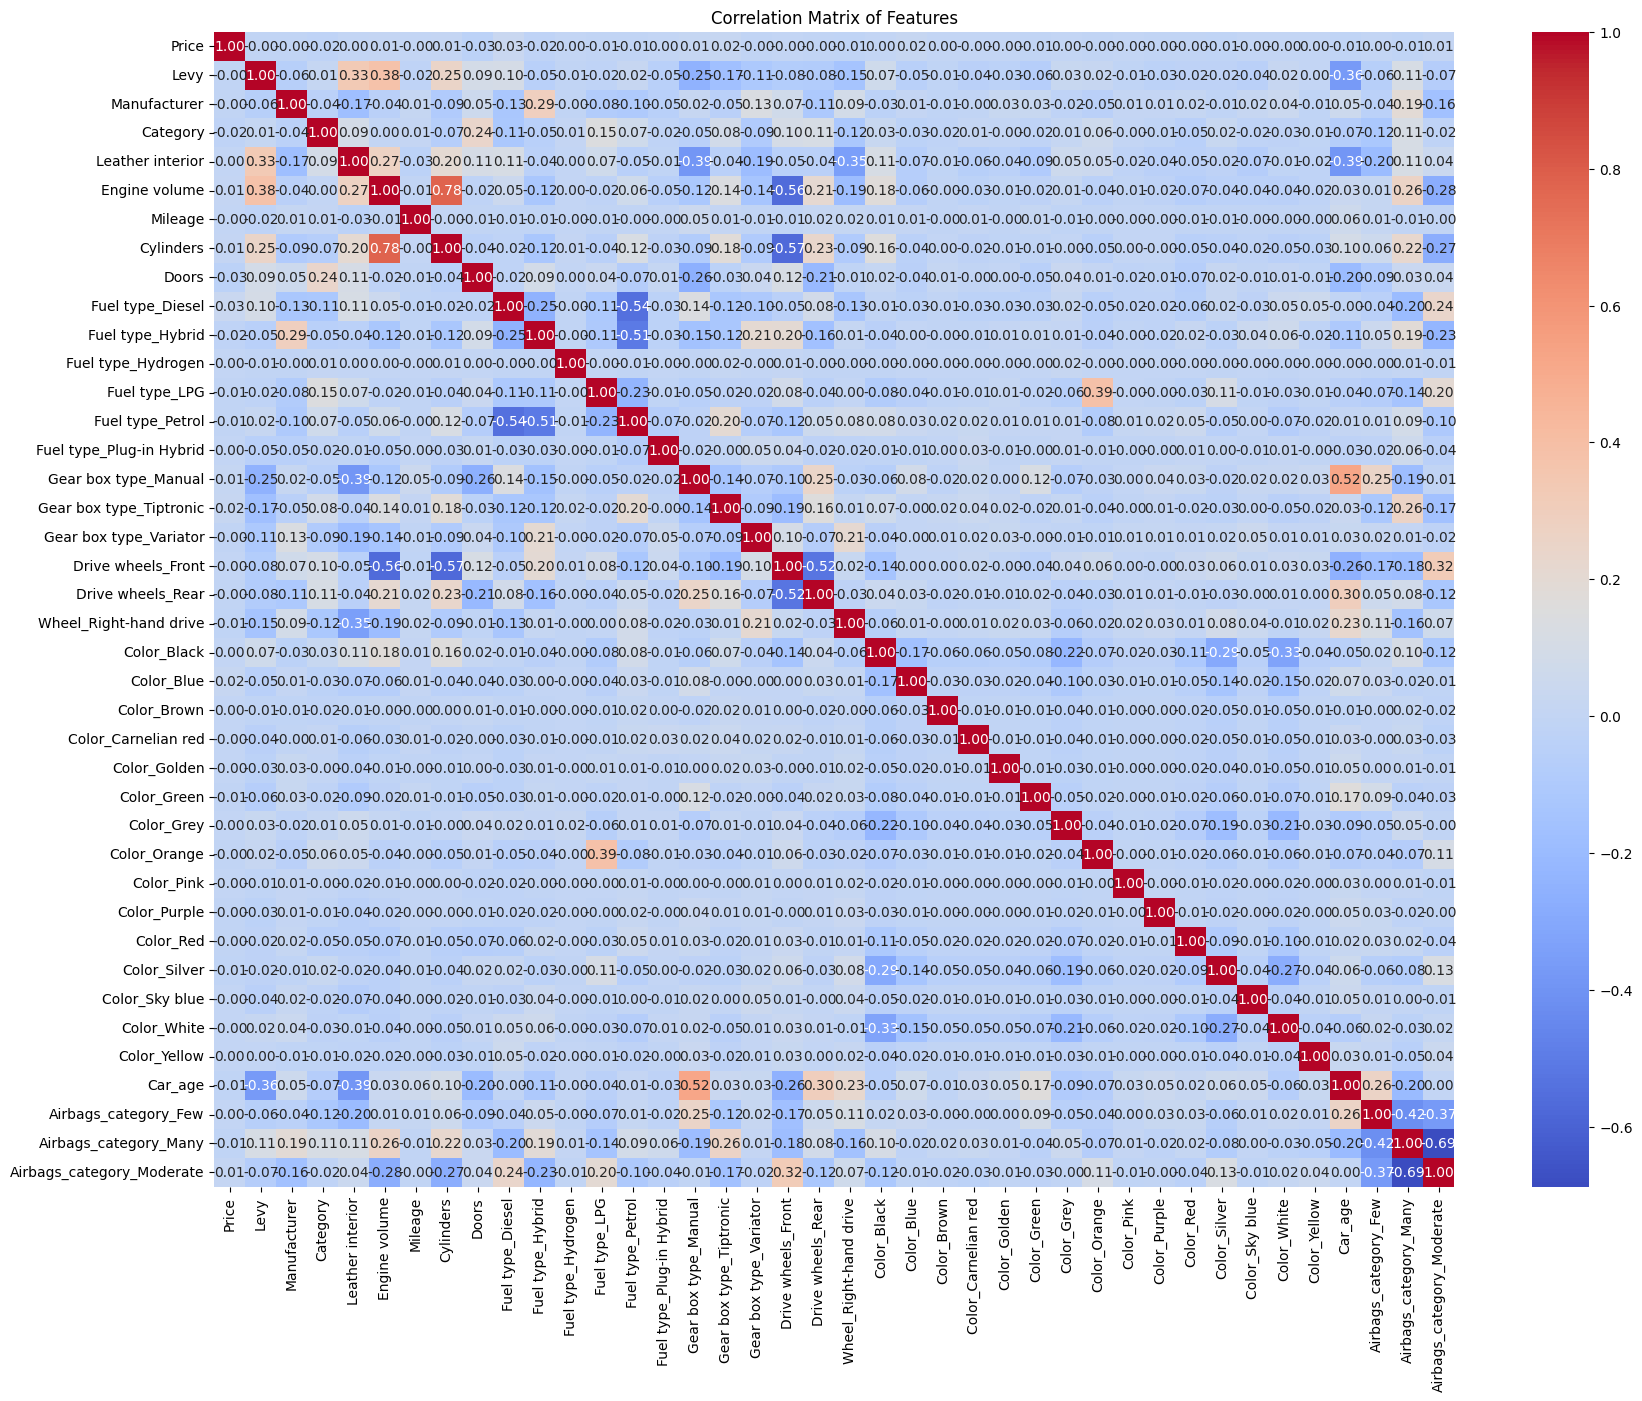

In [ ]:
# Let's make a heatmap for remaining variables to check for multicollinearity

# To create a correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))  # To adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
df.corr()

,Price,Levy,Manufacturer,Category,Leather interior,Engine volume,Mileage,Cylinders,Doors,Fuel type_Diesel,...,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Car_age,Airbags_category_Few,Airbags_category_Many,Airbags_category_Moderate
Price,1.000000,-0.003701,-0.003886,-0.019721,0.000754,0.008753,-0.001758,0.007518,-0.033116,0.032648,...,-0.002298,-0.004866,-0.009007,-0.001877,-0.001018,0.000824,-0.012982,0.001830,-0.011601,0.010405
Levy,-0.003701,1.000000,-0.058426,0.013477,0.333184,0.377438,-0.021034,0.250950,0.094794,0.103026,...,-0.030317,-0.023153,-0.024021,-0.043743,0.022806,0.001994,-0.364712,-0.056550,0.111352,-0.068687
Manufacturer,-0.003886,-0.058426,1.000000,-0.038340,-0.174997,-0.041829,0.012479,-0.089523,0.050826,-0.125777,...,0.005845,0.016776,-0.008700,0.018878,0.039928,-0.011801,0.050922,-0.038565,0.191207,-0.164759
Category,-0.019721,0.013477,-0.038340,1.000000,0.091701,0.002366,0.008126,-0.066238,0.236661,-0.114557,...,-0.012573,-0.051842,0.024533,-0.020041,-0.025069,-0.010356,-0.071538,-0.120045,0.110484,-0.017022
Leather interior,0.000754,0.333184,-0.174997,0.091701,1.000000,0.274647,-0.034379,0.202473,0.106362,0.112529,...,-0.044768,-0.047128,-0.023016,-0.071151,-0.009142,-0.015560,-0.390066,-0.195187,0.113397,0.040088
Engine volume,0.008753,0.377438,-0.041829,0.002366,0.274647,1.000000,-0.006289,0.778524,-0.016913,0.045736,...,-0.022397,-0.067450,-0.038763,-0.036461,-0.044352,-0.018678,0.030906,0.013616,0.258239,-0.275059
Mileage,-0.001758,-0.021034,0.012479,0.008126,-0.034379,-0.006289,1.000000,-0.001768,-0.006281,-0.008736,...,-0.001324,-0.005292,-0.006949,-0.002101,-0.002070,-0.002071,0.063501,0.013002,-0.007812,-0.002406
Cylinders,0.007518,0.250950,-0.089523,-0.066238,0.202473,0.778524,-0.001768,1.000000,-0.035297,-0.018934,...,-0.000710,-0.052830,-0.041458,-0.021352,-0.046507,-0.032069,0.096797,0.055314,0.224018,-0.273397
Doors,-0.033116,0.094794,0.050826,0.236661,0.106362,-0.016913,-0.006281,-0.035297,1.000000,-0.016084,...,-0.014637,-0.065893,0.020114,-0.006423,0.005106,-0.012434,-0.195616,-0.089744,0.033715,0.037278
Fuel type_Diesel,0.032648,0.103026,-0.125777,-0.114557,0.112529,0.045736,-0.008736,-0.018934,-0.016084,1.000000,...,-0.020386,-0.055616,0.023563,-0.028299,0.048956,0.053052,-0.004096,-0.042197,-0.199070,0.237387


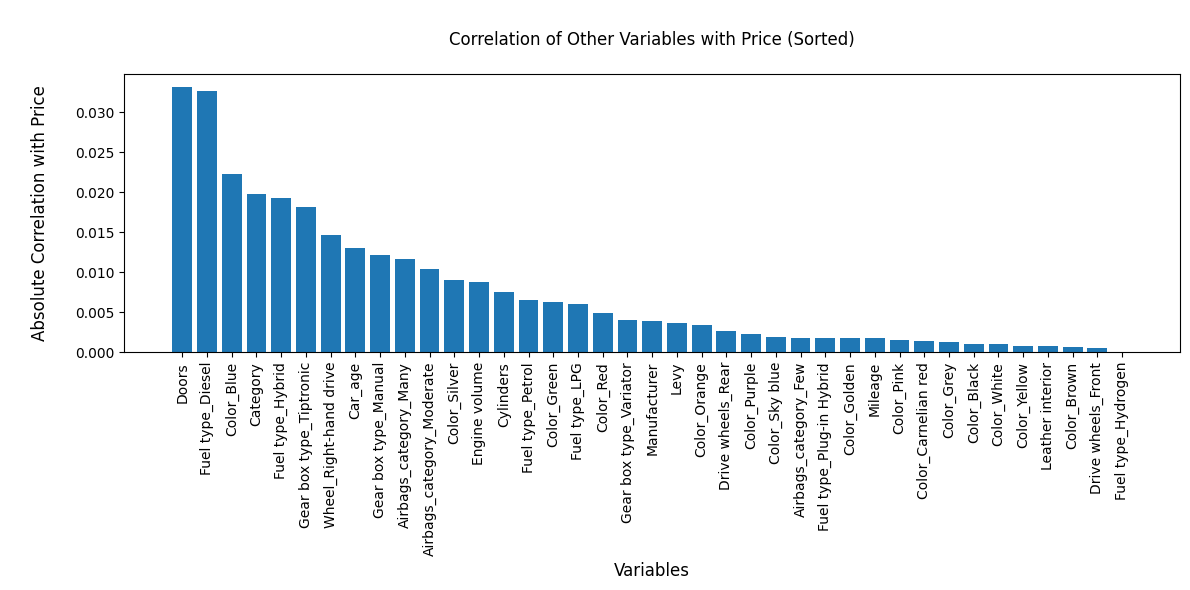

In [ ]:
# Let's make a bar chart showing the coefficient between each variable against target variable (Price), sorted from highest to lowest

# Calculate the correlation between each variable and the target variable (Price)
correlations = df.corr()["Price"].drop("Price")  # Exclude Price itself as the target variable

# Sort the correlations from highest to lowest
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_correlations.index, sorted_correlations.values)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("\nAbsolute Correlation with Price\n", fontsize=12)
plt.title("\nCorrelation of Other Variables with Price (Sorted)\n")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Separating variables for training (80%) and testing (20%)
X = df.drop(columns=["Price"])  # Analyzed variables/features excluding the target
y = df["Price"]  # The target is the car's price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Since we have variables/features/columns with a wide range of numerical values, it is advised to standardise them before we calculate MAE, MSE and R² Score.

In [ ]:
num_cols = ["Levy", "Mileage", "Engine volume", "Cylinders", "Doors", "Car_age"]
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 13125.845973979829
MSE: 380549568.6662545
R² Score: -0.2212891627671172


As we can see, the errors and scores are unacceptable.

The MAE (mean absolute error) is 13,125.

The MSE (mean square error) is 380,549,568.

While the R² Score is -0.22 (negative).

There might be outliers that make the model cannot work well.

In [ ]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Levy              161
Mileage           640
Engine volume    1381
Cylinders        4870
Doors             905
Car_age           982
dtype: int64


As we can see from he information above, there are lots of outliers in numerical variables, such as Price, Levy, Mileage, Engine volume, Cylinders, Doors and Car_age.

We can drop all outliers and repeat the model training to see whether there's a significant improvement or not.

In [ ]:
# Calculating lower and upper limit with IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Setting lower and upper limit for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering remaining values without any outliers
mask = ~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)

# Dropping outliers from the analyzed dataset
df_cleaned = df[mask]

# To check the number of data (rows) before and after dropping the outliers
print(f"The number of data before dropping outliers: {df.shape[0]}")
print(f"The number of data after dropping outliers: {df_cleaned.shape[0]}")

The number of data before dropping outliers: 19237
The number of data after dropping outliers: 12692


After dropping all outliers from numerical variables, we can train the linear regression model again.

In [ ]:
X_cleaned = df_cleaned.drop(columns=["Price"])
y_cleaned = df_cleaned["Price"]

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 8212.779430833092
Mean Squared Error: 129321089.93858269
R-squared: 0.41784504419894153


By dropping the numerical outliers, the score increased quite significantly from,

Before dropping outliers,

MAE: 13125.845973979829

MSE: 380549568.6662545

R² Score: -0.2212891627671172

to,

After dropping outliers,

Mean Absolute Error: 8212.779430833092

Mean Squared Error: 129321089.93858269

R-squared: 0.41784504419894153

But it is still quite far from what we're looking for. We can check from the scatter plot below that blue colored plots don't align with the red colored line.

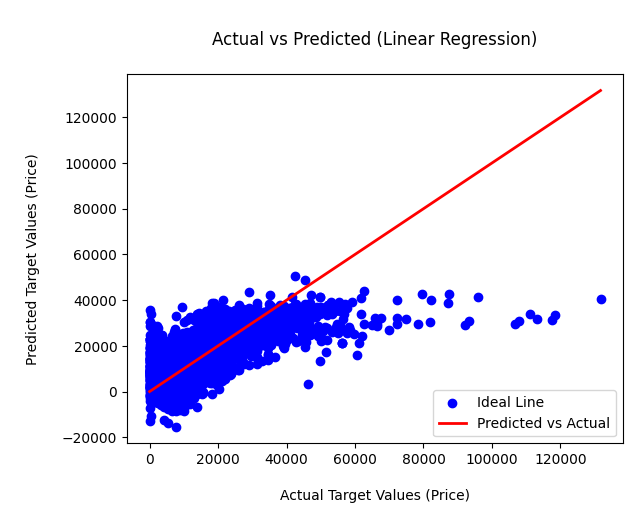

In [ ]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r", lw=2)  # Ideal line
plt.xlabel("\nActual Target Values (Price)\n")
plt.ylabel("\nPredicted Target Values (Price)\n")
plt.title("\nActual vs Predicted (Linear Regression)\n")
plt.legend(["Ideal Line", "Predicted vs Actual"], loc="lower right")
plt.show()

We can try using the Random Forest method in order to get better result.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Using "df_cleaned" which is a dataset without any outliers
X_cleaned = df_cleaned.drop(columns=["Price"])
y_cleaned = df_cleaned["Price"]

# Splitting the data for training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Implementing Random Forest model
model_rf = RandomForestRegressor(random_state=42)

# Model training
model_rf.fit(X_train, y_train)

# Target prediction (y)
y_pred_rf = model_rf.predict(X_test)

# Model evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')

Mean Absolute Error: 3907.362417562767
Mean Squared Error: 48430547.384104334
R-squared: 0.7819838729691786


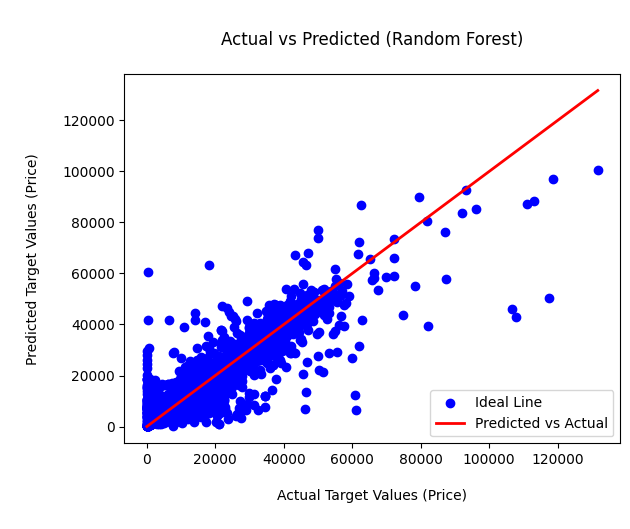

In [ ]:
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)  # Ideal line
plt.xlabel("\nActual Target Values (Price)\n")
plt.ylabel("\nPredicted Target Values (Price)\n")
plt.title("\nActual vs Predicted (Random Forest)\n")
plt.legend(["Ideal Line", "Predicted vs Actual"], loc="lower right")
plt.show()

Based on the scatter plot above and recent calculation, the results have increased significantly,

Mean Absolute Error: 3907.362417562767

Mean Squared Error: 48,430,547.384104334

R-squared: 0.7819838729691786

In order to achieve error rate less than 20%, we can try using Hyperparameter Tuning (GridSearchCV or RandomizedSearchCV) for our Random Forest machine learning.

For this time, I want to use RandomizedSearchCV to get the best parameter.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(100, 1000),
    "max_depth": [10, 20, 30, 40, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                   param_distributions=param_dist,
                                   n_iter=300,  # I tried using 300 random combination
                                   cv=3,  # and using 3-fold cross-validation
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42)

random_search.fit(X_train, y_train)

# Presenting the best parameter for Random Forest machine learning
print(f"Best Parameters: {random_search.best_params_}")


Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 920}


In [ ]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=920)

In [ ]:
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3941.667878606899
Mean Squared Error: 49042228.24991968
R-squared: 0.779230315544228


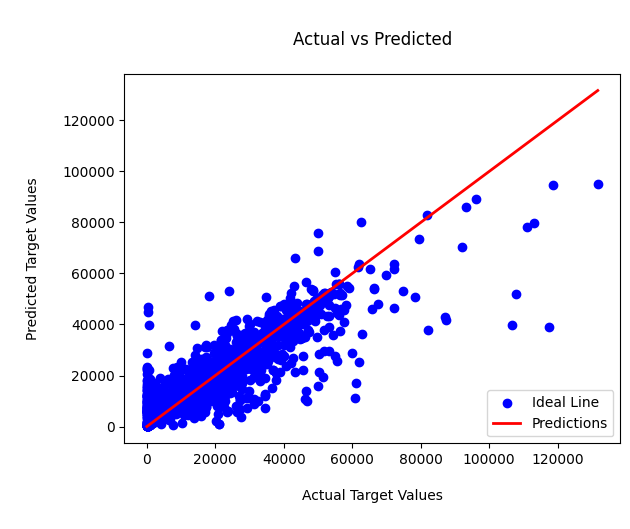

In [ ]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r", lw=2)
plt.xlabel("\nActual Target Values\n")
plt.ylabel("\nPredicted Target Values\n")
plt.title("\nActual vs Predicted\n")
plt.legend(["Ideal Line", "Predictions"], loc="lower right")
plt.show()

It seems that the results are not getting any better. We can check for multicollinearity between features/variables, if we can drop one or some features/variables that have multicollinearity, the results might get better.

This time, we will try using Pearson method to identify any multicollinearities.

In [ ]:
# Counting Pearson correlation
corr_matrix = df_cleaned.corr().abs()

# Take only the upper triangle to avoid any duplicates
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Defining features/variables that have high correlation (above 0.7)
high_corr_features = [(column, idx, upper[column][idx]) for column in upper.columns for idx in upper.index if upper[column][idx] > 0.7]

# Show/print the results
if high_corr_features:
    print("Fatures/variables that have high correlations (> 0.7) are:")
    for feature1, feature2, corr_value in high_corr_features:
        print(f"{feature1} & {feature2}: {corr_value:.2f}")
else:
    print("No features/variables with correlation more than 0.7")

Fatures/variables that have high correlations (> 0.7) are:
Airbags_category_Moderate & Airbags_category_Many: 0.74


It seems that only those two variables that have high correlation, I decided to try dropping "Airbags_category_Moderate" for this moment.

In [ ]:
df_cleaned1 = df_cleaned.drop(columns=["Airbags_category_Moderate"])
X = df_cleaned1.drop(columns=["Price"])
y = df_cleaned1["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=291, max_depth=40, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3989.7773647275067
Mean Squared Error: 49861853.85342776
R-squared: 0.7755406690433342


The results are as following,

Mean Absolute Error: 3989.7773647275067

Mean Squared Error: 49,861,853.85342776

R-squared: 0.7755406690433342

But it keeps geeting worse, therefore dropping "Airbags_category_Moderate" is not advised.

We will abandon df_cleaned1 (without Airbags_category_Moderate) and keep using df_cleaned for further analysis.

Let's try using SHAP to analyse feature/variable importance.

In [ ]:
print(X.dtypes)

Levy                          int64
Manufacturer                  int64
Category                      int64
Leather interior              int64
Engine volume               float64
Mileage                       int64
Cylinders                     int64
Doors                         int64
Fuel type_Diesel               bool
Fuel type_Hybrid               bool
Fuel type_Hydrogen             bool
Fuel type_LPG                  bool
Fuel type_Petrol               bool
Fuel type_Plug-in Hybrid       bool
Gear box type_Manual           bool
Gear box type_Tiptronic        bool
Gear box type_Variator         bool
Drive wheels_Front             bool
Drive wheels_Rear              bool
Wheel_Right-hand drive         bool
Color_Black                    bool
Color_Blue                     bool
Color_Brown                    bool
Color_Carnelian red            bool
Color_Golden                   bool
Color_Green                    bool
Color_Grey                     bool
Color_Orange                

In [ ]:
print(X.isnull().sum())
print((X == np.inf).sum())
print((X == -np.inf).sum())

Levy                        0
Manufacturer                0
Category                    0
Leather interior            0
Engine volume               0
Mileage                     0
Cylinders                   0
Doors                       0
Fuel type_Diesel            0
Fuel type_Hybrid            0
Fuel type_Hydrogen          0
Fuel type_LPG               0
Fuel type_Petrol            0
Fuel type_Plug-in Hybrid    0
Gear box type_Manual        0
Gear box type_Tiptronic     0
Gear box type_Variator      0
Drive wheels_Front          0
Drive wheels_Rear           0
Wheel_Right-hand drive      0
Color_Black                 0
Color_Blue                  0
Color_Brown                 0
Color_Carnelian red         0
Color_Golden                0
Color_Green                 0
Color_Grey                  0
Color_Orange                0
Color_Pink                  0
Color_Purple                0
Color_Red                   0
Color_Silver                0
Color_Sky blue              0
Color_Whit

In [ ]:
# Retrain the model before executing SHAP
best_rf = RandomForestRegressor(
    max_depth=40, max_features="sqrt", min_samples_leaf=1,
    min_samples_split=2, n_estimators=291, random_state=42
)

best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, max_features='sqrt', n_estimators=291,
                      random_state=42)

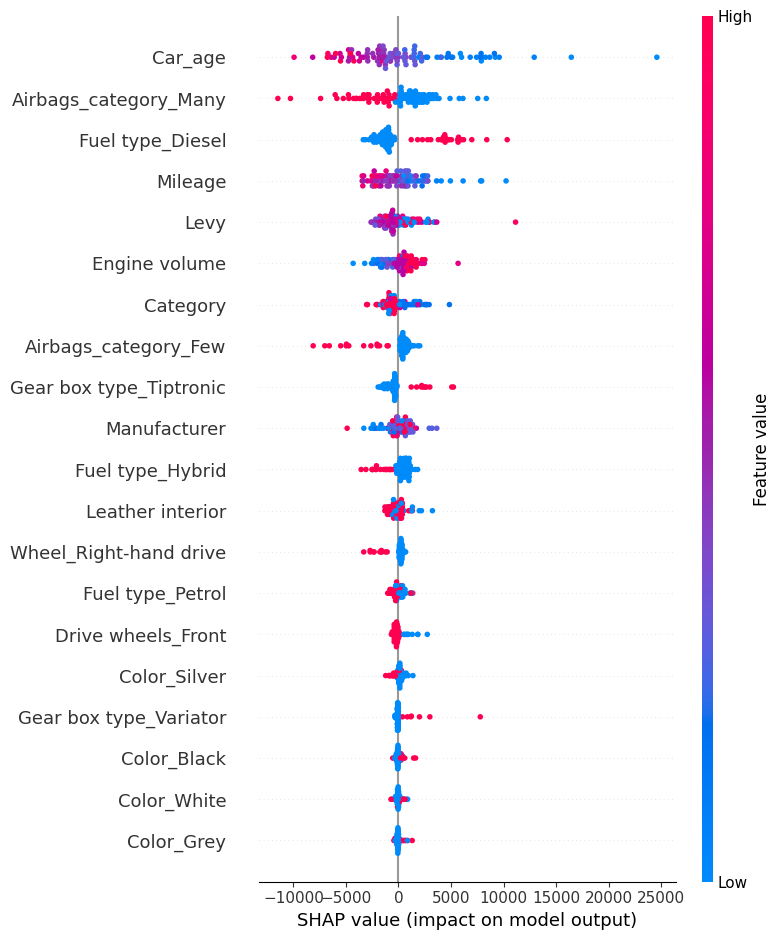

In [ ]:
import shap

X = df_cleaned.drop(columns=["Price"])
y = df_cleaned["Price"]

# Make a SHAP Explainer using best trained model
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_train[:100].values)

# Plotting SHAP summary
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train[:100])
plt.show()

Based on the SHAP summary plot above, we can see that features/variables with significant impact to Price are as following,

1. Car_age
2. Airbags_category_Many
3. Fuel type_Diesel
4. Mileage
5. Levy
6. Engine volume
7. Category
8. Drive wheels_Front

In contrast, the following features/variables have little impact to Price,

1. Color variables
2. Gearbox type_Variator

Let's try to train the model using only selected features/variables, they might yield better results for MAE, MSE and R-squared.

In [ ]:
selected_features = [
    "Car_age", "Airbags_category_Many", "Fuel type_Diesel",
    "Mileage", "Levy", "Engine volume", "Category", "Drive wheels_Front"
]

X_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
best_rf.fit(X_selected, y_train)
y_pred = best_rf.predict(X_test_selected)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MAE: 4948.43504596744
MSE: 70041214.74961407
R2 Score: 0.6847007684811591


It seems that the results are even worse by using 8 selected features...

Therefore I tried to choose features/variables with percentage of importance > 5%.

In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_selected.columns)
feature_importances.sort_values(ascending=False).head(15)

,0
Mileage,0.277214
Car_age,0.227174
Levy,0.146511
Engine volume,0.098896
Fuel type_Diesel,0.095873
Airbags_category_Many,0.069484
Category,0.061794
Drive wheels_Front,0.023055


We won't choose Drive wheels_front for the next model traning.

In [ ]:
selected_features1 = [
    "Mileage", "Car_age", "Levy", "Engine volume",
    "Fuel type_Diesel", "Airbags_category_Many", "Category"
]

X_train_selected = X_train[selected_features1]
X_test_selected = X_test[selected_features1]

In [ ]:
best_rf_selected = RandomForestRegressor(
    max_depth=40, max_features="sqrt", min_samples_leaf=1,
    min_samples_split=2, n_estimators=291, random_state=42
)

best_rf_selected.fit(X_train_selected, y_train)

RandomForestRegressor(max_depth=40, max_features='sqrt', n_estimators=291,
                      random_state=42)

In [ ]:
y_pred = best_rf_selected.predict(X_test_selected)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 5066.6759753383185
MSE: 72526946.90540288
R2 Score: 0.6735109363047234


Since the scores are getting worse,

MAE: 5066.6759753383185

MSE: 72,526,946.90540288

R2 Score: 0.6735109363047234

We should try a different approach. Based on my research using ChatGPT, it advised me to try using LightGBM method as following,

In [ ]:
import lightgbm as lgb

best_lgb = lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=300,
    random_state=42
)

# Train the model with selected features/variables
best_lgb.fit(X_train_selected, y_train)

# Prediction
y_pred_lgb = best_lgb.predict(X_test_selected)

# Model Evaluation
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM Results:")
print("MAE:", mae_lgb)
print("MSE:", mse_lgb)
print("R2 Score:", r2_lgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 10153, number of used features: 7
[LightGBM] [Info] Start training from score 17522.653107
LightGBM Results:
MAE: 5916.555950595629
MSE: 79615116.41408548
R2 Score: 0.6416026604852321


Unfortunately the scores are not getting better, they're getting worse.

LightGBM Results:
MAE: 5916.555950595629
MSE: 79,615,116.41408548
R2 Score: 0.6416026604852321

Then I decided to try using Feature Engineering.

In [ ]:
# We start from the beginning by creating a copy of df_cleaned
df_cleaned = df_cleaned.copy()

# Feature Engineering is about creating new variables/features

# Counting the average car's mileage per year (Mileage/Car_age)
df_cleaned["Mileage_per_year"] = df_cleaned["Mileage"] / (df_cleaned["Car_age"] + 1)

# Levy's values distribution is skewed (the range is too wide), "log" can help to balance it (Log_Levy)
df_cleaned["Log_Levy"] = np.log(df_cleaned["Levy"] + 1)

# Counting the efficiency ratio of car's engine power against its age (Engine volume/Car_age)
df_cleaned["Engine_power_ratio"] = df_cleaned["Engine volume"] / (df_cleaned["Car_age"] + 1)

# Check the relation between mileage and engine volume (Mileage*Engine volume)
df_cleaned["Mileage_Engine"] = df_cleaned["Mileage"] * df_cleaned["Engine volume"]

# Check the relation between car's age and the number of airbags, newer cars usually have more airbags (Car_age/Airbags_category_many)
df_cleaned["CarAge_Airbags"] = df_cleaned["Car_age"] * df_cleaned["Airbags_category_Many"]

# Defining and separating X dan y
X = df_cleaned.drop(columns=["Price"])
y = df_cleaned["Price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose features/variables for model training
selected_features3 = [
    "Mileage_per_year", "Log_Levy", "Engine_power_ratio",
    "Mileage_Engine", "CarAge_Airbags", "Fuel type_Diesel", "Drive wheels_Front"
]

# Check any missing features/variables
missing_features = [f for f in selected_features3 if f not in X_train.columns]
if missing_features:
    print("Features/variables not found:", missing_features)
else:
    X_train_selected = X_train[selected_features3]
    X_test_selected = X_test[selected_features3]

In [ ]:
print("Train Features:", X_train_selected.columns.tolist())
print("Test Features:", X_test_selected.columns.tolist())

Train Features: ['Mileage_per_year', 'Log_Levy', 'Engine_power_ratio', 'Mileage_Engine', 'CarAge_Airbags', 'Fuel type_Diesel', 'Drive wheels_Front']
Test Features: ['Mileage_per_year', 'Log_Levy', 'Engine_power_ratio', 'Mileage_Engine', 'CarAge_Airbags', 'Fuel type_Diesel', 'Drive wheels_Front']


In [ ]:
best_model.fit(X_train_selected, y_train)
y_pred = best_model.predict(X_test_selected)

In [ ]:
y_pred = best_model.predict(X_test_selected)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 5276.957834346465
MSE: 78742800.20815448
R2 Score: 0.6455295002802685


In [ ]:
print(X_train_selected.info())
print(X_train_selected.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 10153 entries, 6451 to 11047
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mileage_per_year    10153 non-null  float64
 1   Log_Levy            10153 non-null  float64
 2   Engine_power_ratio  10153 non-null  float64
 3   Mileage_Engine      10153 non-null  float64
 4   CarAge_Airbags      10153 non-null  int64  
 5   Fuel type_Diesel    10153 non-null  bool   
 6   Drive wheels_Front  10153 non-null  bool   
dtypes: bool(2), float64(4), int64(1)
memory usage: 495.8 KB
None
       Mileage_per_year      Log_Levy  Engine_power_ratio  Mileage_Engine  \
count      10153.000000  10153.000000        10153.000000    1.015300e+04   
mean        8876.224207      5.129286            0.155087    2.358324e+05   
std         5402.368163      2.762420            0.055896    1.597117e+05   
min            0.000000      0.000000            0.038462    0.000000e+00   
25

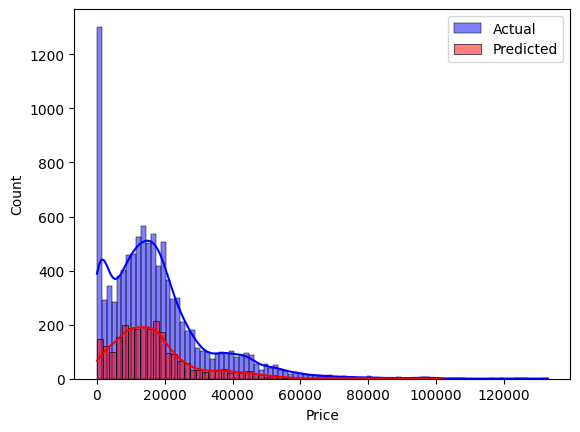

In [ ]:
sns.histplot(y_train, color="blue", label="Actual", kde=True)
sns.histplot(y_pred, color="red", label="Predicted", kde=True)
plt.legend()
plt.show()

It seems that using Feature Engineering doesn't solve the problem, the error rate just keeps increasing and could not reach the target which is below 20%.

At this point, I'm going to go back and use the earlier Random Forest model and just try to improve it.

Based on the bar chart above, the car Price distribution is most likely the problem that makes the model could not perform well enough.

Maybe Price wasn't included when I was cleaning outliers before.

Let's start from the beginning again.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Using cleaned dataset without any outliers
X_cleaned = df_cleaned.drop(columns=["Price"])
y_cleaned = df_cleaned["Price"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
model_rf = RandomForestRegressor(random_state=42)

# Model training
model_rf.fit(X_train, y_train)

# Price prediction test
y_pred_rf = model_rf.predict(X_test)

# Model evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Mean Absolute Error: 3967.4184169566515
Mean Squared Error: 50798525.55644478
R-squared: 0.7713241249813491


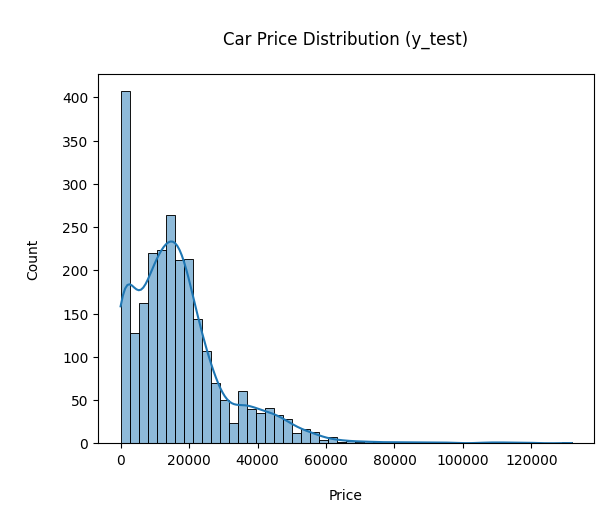

In [ ]:
sns.histplot(y_test, bins=50, kde=True)
plt.title("\nCar Price Distribution (y_test)\n")
plt.xlabel("\nPrice\n")
plt.ylabel("\nCount\n")
plt.show()

Before testing the Random Forest model again, I'm going to identify and drop outliers from Price.

In [ ]:
# Calculating lower and upper limit with IQR only for Price
Q1_price = df["Price"].quantile(0.25)
Q3_price = df["Price"].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Setting lower and upper limit for outliers'
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Dropping outliers from Price
df_cleaned = df[(df["Price"] >= lower_bound_price) & (df["Price"] <= upper_bound_price)]

# To check the number of data (rows) before and after dropping the outliers from Price
print(df_cleaned["Price"].describe())

count    18164.000000
mean     14024.917860
std      11377.779677
min          1.000000
25%       4861.000000
50%      12231.000000
75%      20071.000000
max      47120.000000
Name: Price, dtype: float64


Somehow the minimum Price which is 1 wasn't included when we filter the outliers previously.

Therefore I set a new lower limit of car's Price which is 1,000 while the new upper limit is below 100,000.

In [ ]:
df_cleaned = df[(df["Price"] >= 1000) & (df["Price"] <= 100000)]
pd.options.display.float_format = '{:,.2f}'.format
print(df_cleaned["Price"].describe())

count   16,550.00
mean    18,908.81
std     15,212.95
min      1,000.00
25%      8,467.00
50%     15,060.00
75%     23,834.00
max     99,440.00
Name: Price, dtype: float64


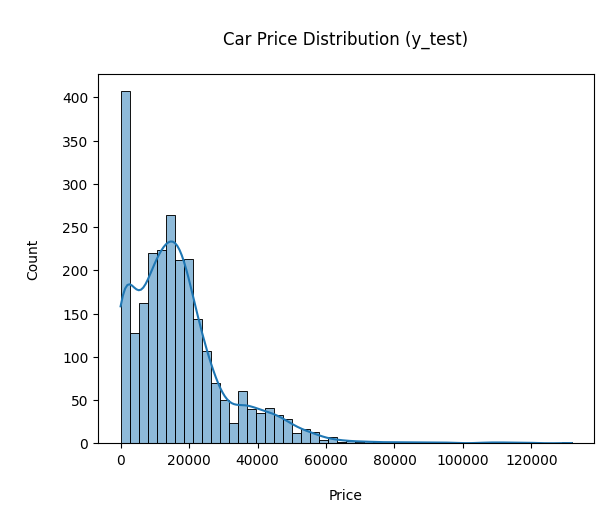

In [ ]:
sns.histplot(y_test, bins=50, kde=True)
plt.title("\nCar Price Distribution (y_test)\n")
plt.xlabel("\nPrice\n")
plt.ylabel("\nCount\n")
plt.show()

After we set up the lower and upper limit of our target (Price), we can continue training the model.

In [ ]:
X_cleaned = df_cleaned.drop(columns=["Price"])
y_cleaned = df_cleaned["Price"]

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Price prediction test
y_pred_rf = model_rf.predict(X_test)

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print(f"Mean Absolute Error (MAE): {mae_rf:,.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:,.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"MAPE: {mape_rf:.2f}%")

Mean Absolute Error (MAE): 4,049.52
Mean Squared Error (MSE): 51,850,903.72
R-squared (R²): 0.7781
MAPE: 40.69%


MAPE is Mean Absolute Percentage Error. The lower the value, the more accurate the model is.

I'll try to re-scale the dataset again before train the model again.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initiating Random Forest
model_rf = RandomForestRegressor(random_state=42)

# Model training with scaled dataset
model_rf.fit(X_train_scaled, y_train)

# Price prediction
y_pred_rf = model_rf.predict(X_test_scaled)

# Model Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Counting MAPE
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

# Print and show the evaluation results
print(f"Mean Absolute Error (MAE): {mae_rf:,.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:,.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"MAPE: {mape_rf:.2f}%")


Mean Absolute Error (MAE): 4,051.93
Mean Squared Error (MSE): 51,901,936.70
R-squared (R²): 0.7778
MAPE: 40.67%


I tried consulting with ChatGPT and it directed me to use log transformation again, then I tried again to check the results.

In [ ]:
# Transforming target Log (Price)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Retrain the model
model_rf.fit(X_train, y_train_log)
y_pred_log = model_rf.predict(X_test)

y_pred_rf = np.expm1(y_pred_log)

# MAPE evaluation
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
print(f"New MAPE after Log: {mape_rf:.2f}%")

New MAPE after Log: 30.36%


In [ ]:
print(df_cleaned.columns)

Index(['Price', 'Levy', 'Manufacturer', 'Category', 'Leather interior',
       'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Fuel type_Diesel',
       'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG',
       'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Wheel_Right-hand drive',
       'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Carnelian red',
       'Color_Golden', 'Color_Green', 'Color_Grey', 'Color_Orange',
       'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver',
       'Color_Sky blue', 'Color_White', 'Color_Yellow', 'Car_age',
       'Airbags_category_Few', 'Airbags_category_Many',
       'Airbags_category_Moderate'],
      dtype='object')


Then I tried Fine-tune preprocessing before retrain the model.



In [ ]:
# Dropping all numerical outliers with IQR
num_cols = df_cleaned.select_dtypes(include=["number"]).columns
Q1 = df_cleaned[num_cols].quantile(0.25)
Q3 = df_cleaned[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering dataset from the outliers
mask = ~((df_cleaned[num_cols] < lower_bound) | (df_cleaned[num_cols] > upper_bound)).any(axis=1)
df_cleaned = df_cleaned[mask]

# Standardizing all numerical variables/features except for the target (Price)
scaler = StandardScaler()
numeric_features = df_cleaned.drop(columns=["Price"]).select_dtypes(include=["number"]).columns
df_cleaned[numeric_features] = scaler.fit_transform(df_cleaned[numeric_features])

# Deleting any duplicates
df_cleaned = df_cleaned.drop_duplicates()


In [ ]:
# Retrain the model with transformed Log data
model_rf.fit(X_train, y_train_log)

# Model prediction
y_pred_log = model_rf.predict(X_test)

# Transform back to the original scale
y_pred_rf = np.expm1(y_pred_log)

# Model evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

# Show evaluation results
print(f"Mean Absolute Error (MAE): {mae_rf:,.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:,.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"MAPE: {mape_rf:.2f}%")


Mean Absolute Error (MAE): 4,007.07
Mean Squared Error (MSE): 55,990,453.38
R-squared (R²): 0.7603
MAPE: 30.36%


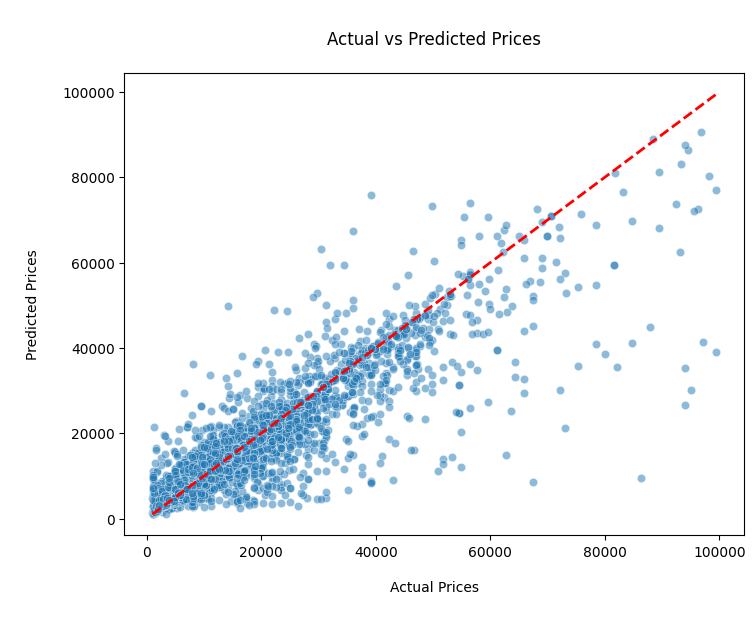

In [ ]:
# The scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel("\nActual Prices\n")
plt.ylabel("\nPredicted Prices\n")
plt.title("\nActual vs Predicted Prices\n")
plt.show()

Finally, the maximum results that I can do is as following,

Mean Absolute Error (MAE): 4,007.07

Mean Squared Error (MSE): 55,990,453.38

R-squared (R²): 0.7603

MAPE: 30.36%

I hope you can give me some advise on what I did wrong and which process I miss.

Thank you for your kind attention.